# A simple process  

In [71]:
import numpy as np
import pylab as plt
%matplotlib inline

The X's are generated with this process 
$$X_{t + 1} = X_t + \epsilon_t$$
Where $\epsilon_t \sim \mathcal{N} (0, 1)$

In [72]:
X = np.cumsum(np.random.normal(size=10))
obs = np.round(X)


## Algorithm to implement

We have $P (X_0 \mid O_o) = \mathcal{U}(O_0 - 1/2, O_0 + 1/2))$

In [76]:
center0 = obs[0]
# generate the initial particles
particles = []
particles.append(np.random.uniform(center0 - 0.5, center0 + 0.5, size=10**3))

def generate_new_particles(sample, obs): 
    lb = obs - .5
    ub = obs + .5
    new_particles = []
    while len(new_particles) < 10**3: 
        x = np.random.choice(sample) + np.random.normal(loc=0, scale=1)
        if (x > lb) and (x < ub):
            new_particles.append(x)
    return new_particles
for i in range(1, len(obs)): 
    particles.append(generate_new_particles(particles[i-1], obs[i]))

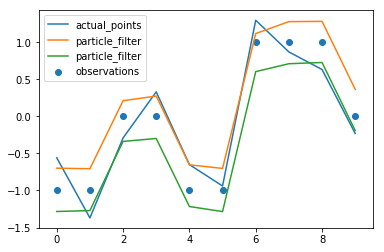

In [77]:
plt.plot(X, label='actual_points')
plt.scatter(range(len(obs)), obs, label='observations')
plt.plot(np.mean(np.array(particles), axis=1) + np.std(np.array(particles), axis=1), label='particle_filter')
plt.plot(np.mean(np.array(particles), axis=1) - np.std(np.array(particles), axis=1), label='particle_filter')
plt.legend(loc='best')

In [67]:
np.var(np.array(particles), axis=1)

array([0.08593791, 0.07801449, 0.06862781, 0.08199036, 0.0760743 ,
       0.08098005, 0.07709154, 0.07857625, 0.07463404, 0.08410246])